In [4]:
import sys
sys.path.append("..")
from src.data_utils import *

df = load_data("../data/sierraleone_raw.csv")
df = drop_high_missing(df)

df = clean_outliers(df, zscore_columns=["GHI", "ModA", "ModB"], clip_columns=["DHI", "WS", "WSgust"])
df = clean_limit(df)
df_clean = df.copy()

cols_to_impute = ['DHI', 'WS', 'WSgust', 'ModA', 'ModB']
for col in cols_to_impute:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
df = finalize_clean(df)
save_clean(df, "../data/sierraleone_clean(2).csv")

df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000,522622.000000
mean,199.008252,112.884599,114.037402,201.413363,193.021494,26.300091,79.480459,1.130535,1.670006,0.362582,132.545457,7.134522,999.871154,0.000972,0.004833,32.373780,32.469807
std,288.807785,213.619332,153.976384,293.585536,281.614131,4.402242,20.568151,1.194197,1.554479,0.294963,114.272601,7.519695,2.106225,0.031162,0.047690,12.339053,11.923228
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,0.000000,0.000000,0.000000,2.900000,2.700000,25.200000,85.500000,0.800000,1.600000,0.400000,160.200000,6.200000,1000.000000,0.000000,0.000000,26.500000,26.800000
75%,354.700000,97.100000,221.500000,351.775000,337.800000,29.400000,96.800000,2.000000,2.600000,0.600000,233.800000,12.000000,1001.000000,0.000000,0.000000,40.500000,40.900000
max,1097.000000,921.000000,553.500000,1109.200000,1064.000000,39.900000,100.000000,4.600000,6.200000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.000000


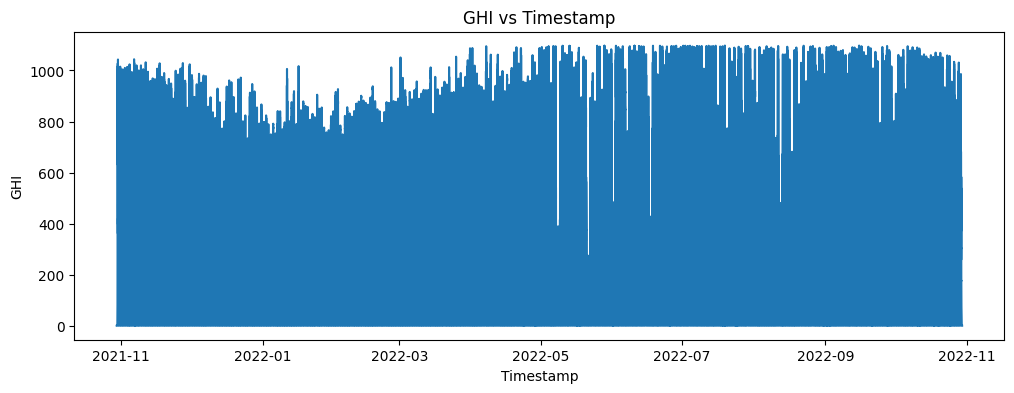

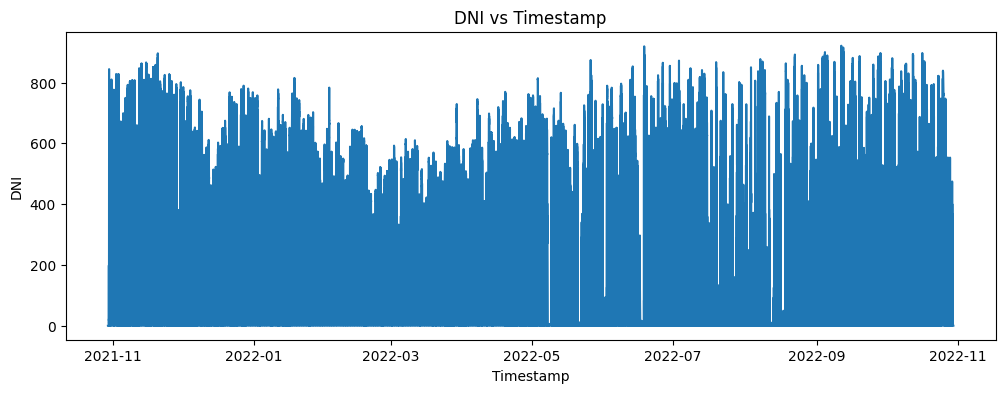

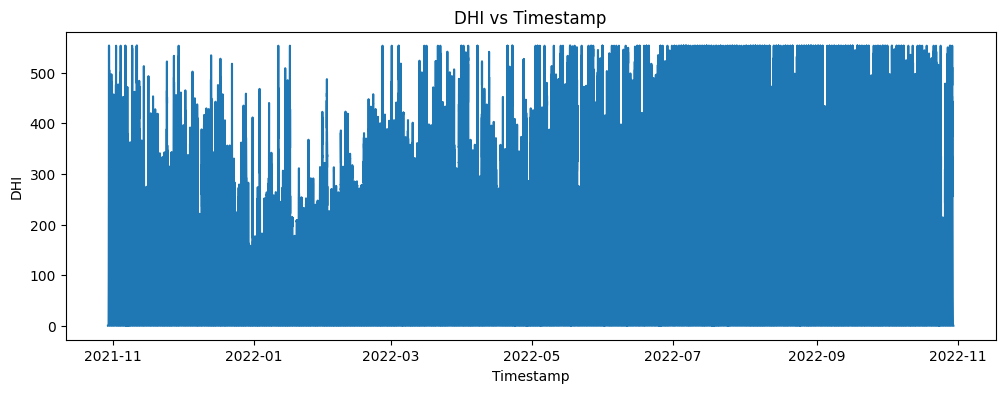

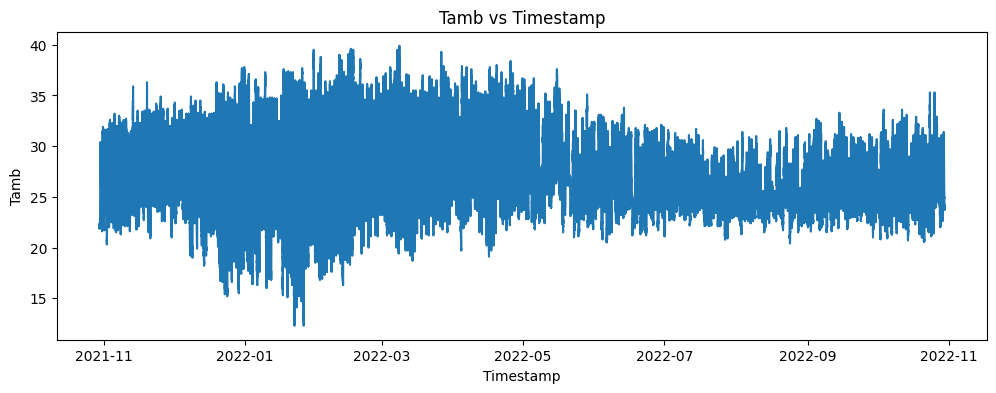

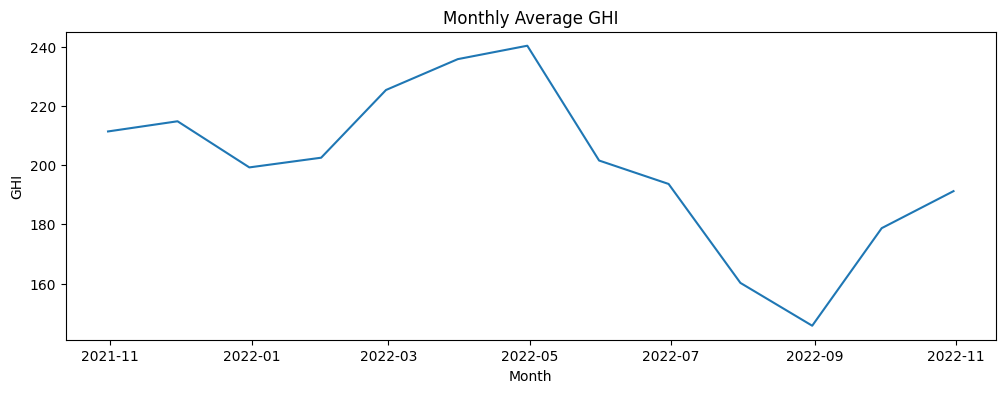

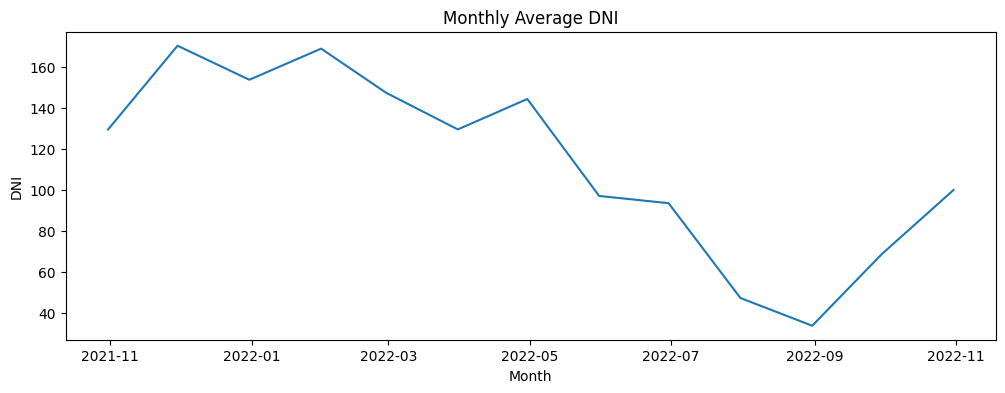

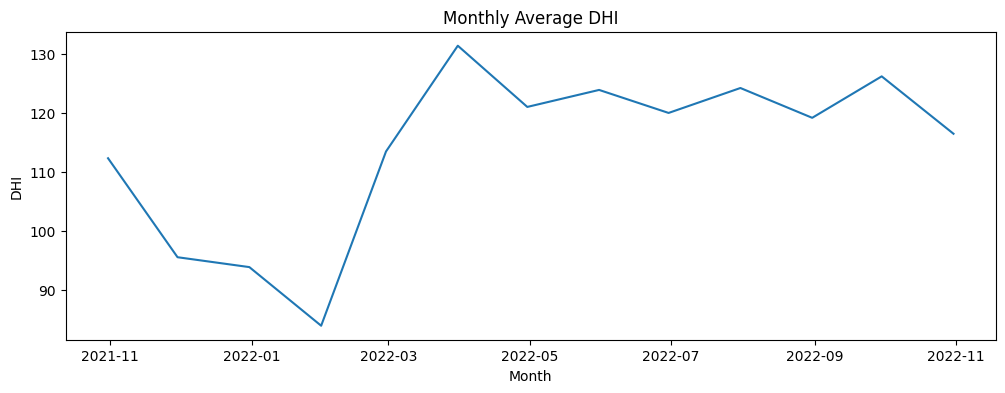

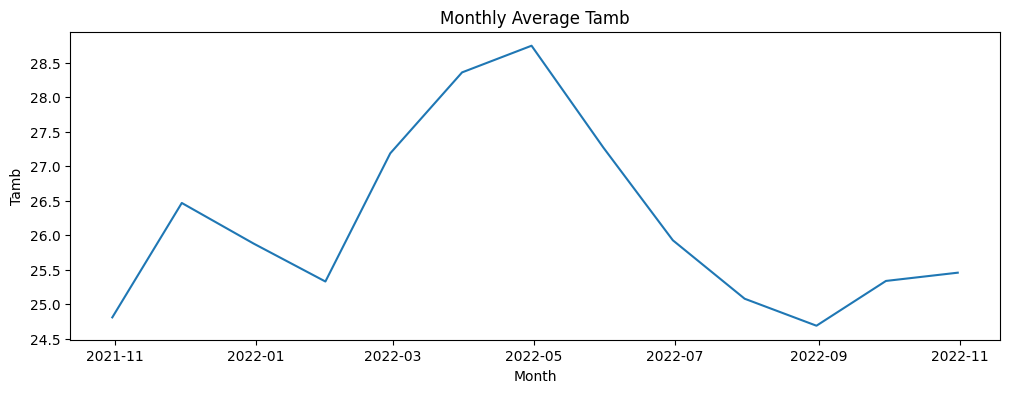

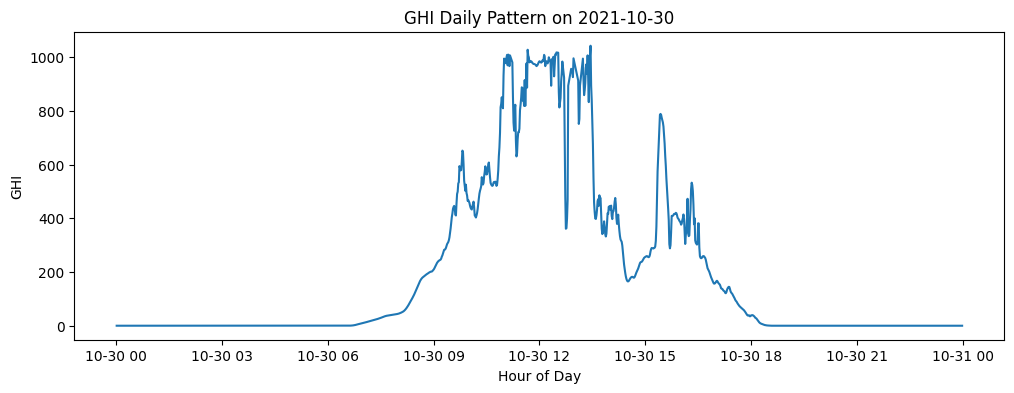

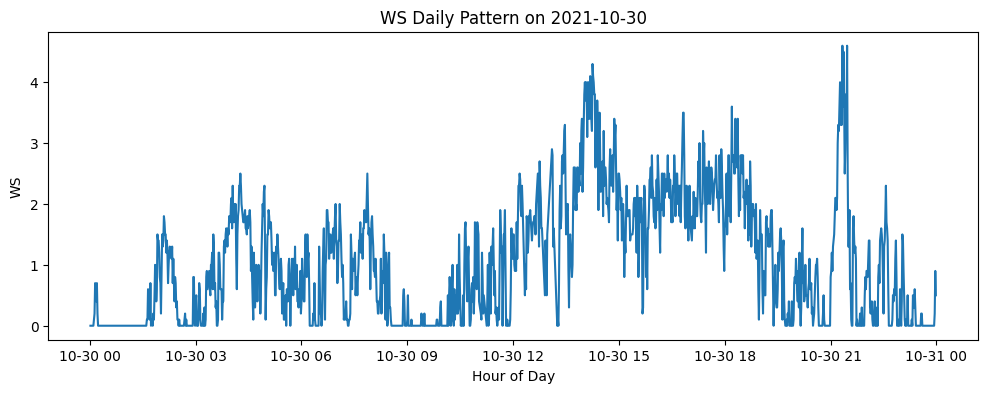

In [5]:
import sys
sys.path.append("..")

import pandas as pd
from src.plot_utils import *

df = pd.read_csv("../data/sierraleone_clean(2).csv", parse_dates=['Timestamp'])
df = df.set_index('Timestamp')
df = df.sort_index()

df.head()

plot_time_series(df, ['GHI', 'DNI', 'DHI', 'Tamb'])
plot_monthly_average(df, ['GHI', 'DNI', 'DHI', 'Tamb'])
plot_daily_pattern(df, "GHI")
plot_daily_pattern(df, "WS")

